In [ ]:
#Clustering Analysis Assignment Guide

In [ ]:
#1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
#2. Load Dataset

In [5]:
# Load Excel file
data = pd.read_excel("EastWestAirlines.xlsx")

# Display first few rows
print(data.head())
print(data.info())


  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                    

In [7]:
#3. Data Preprocessing

In [9]:
#Drop ID column (not useful for clustering).

#Handle missing values (if any).

#Remove outliers (boxplot / IQR method).

#Scale features (important for K-Means & DBSCAN)

In [31]:
#1. Load Dataset

In [21]:
import pandas as pd

# Load cleaned Excel file
data = pd.read_excel("EastWestAirlines.xlsx")

# Check first rows and column names
print(data.head())
print(data.columns)


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_

In [23]:
#2. Drop Unnecessary Columns (ID#)

In [25]:
# Drop ID column
data = data.drop(columns=["ID#"])


In [27]:
#3. Handle Missing Values

In [29]:
print(data.isnull().sum())


Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_excel("EastWestAirlines.xlsx")

# Drop ID column
data = data.drop(columns=["ID#"])

# Outlier removal (optional, keep if you want)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Final Preprocessed Data Shape:", scaled_data.shape)


Final Preprocessed Data Shape: (2875, 11)


In [35]:
#🔹 Step 4: EDA for EastWestAirlines

In [37]:
#1. Basic Statistics
#Check overall structure and summary of numeric features.

In [39]:
print(data.shape)   # Rows & Columns
print(data.describe())  # Summary stats


(2875, 11)
             Balance  Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    2875.000000      2875.0  2875.000000     2875.0     2875.0   
mean    46840.297739         0.0     1.829913        1.0        1.0   
std     42611.722286         0.0     1.154373        0.0        0.0   
min        50.000000         0.0     1.000000        1.0        1.0   
25%     15275.000000         0.0     1.000000        1.0        1.0   
50%     33327.000000         0.0     1.000000        1.0        1.0   
75%     65980.500000         0.0     3.000000        1.0        1.0   
max    202636.000000         0.0     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   2875.000000  2875.000000        2875.000000      2875.000000   
mean   10872.930435     9.385739          57.085217         0.198609   
std    13664.119401     7.753492         150.711569         0.484841   
min        0.000000     0.000000           0.000000         0

In [43]:
#2. Distribution of Key Features
#Look at how values are spread.

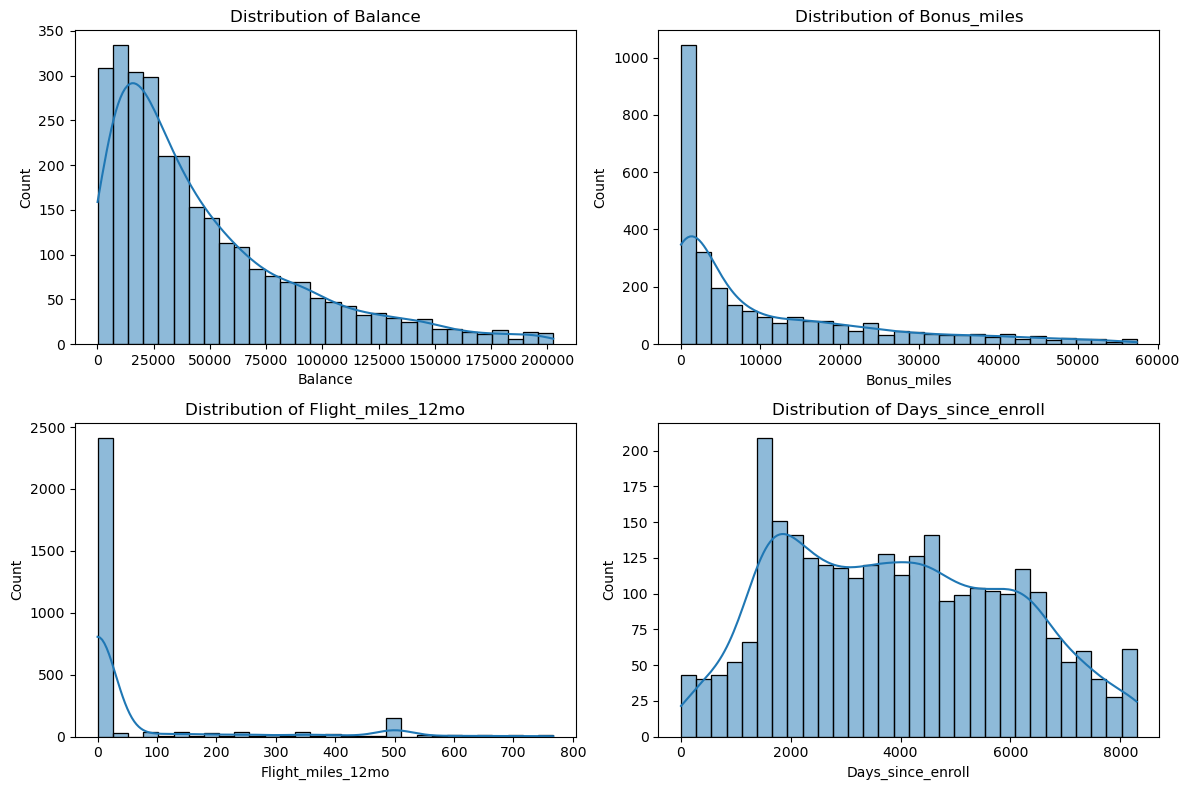

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for a few important features
features = ["Balance", "Bonus_miles", "Flight_miles_12mo", "Days_since_enroll"]

plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [47]:
#3. Correlation Heatmap
#See how features are related.

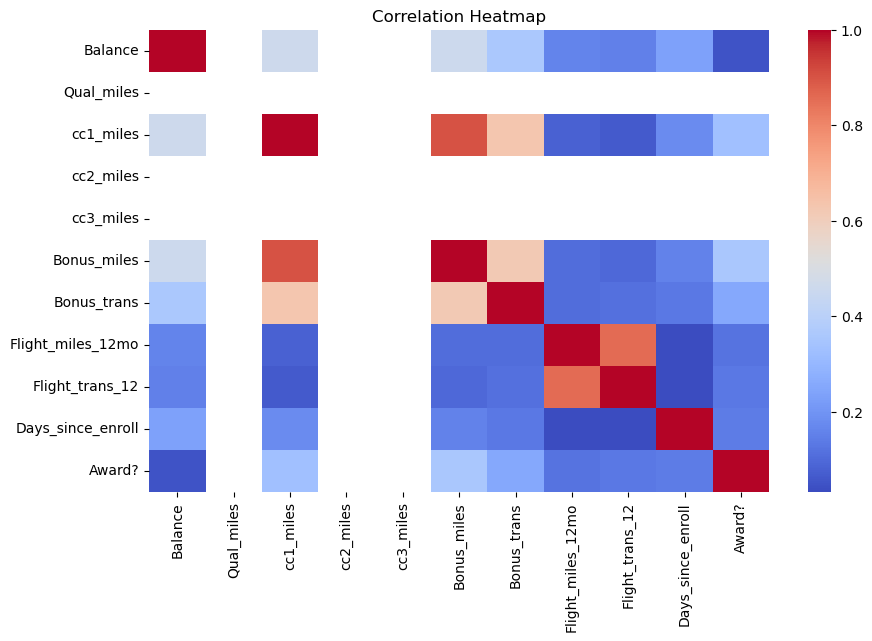

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [51]:
#4. Pairplot (for a subset of features)

#To visualize relationships.

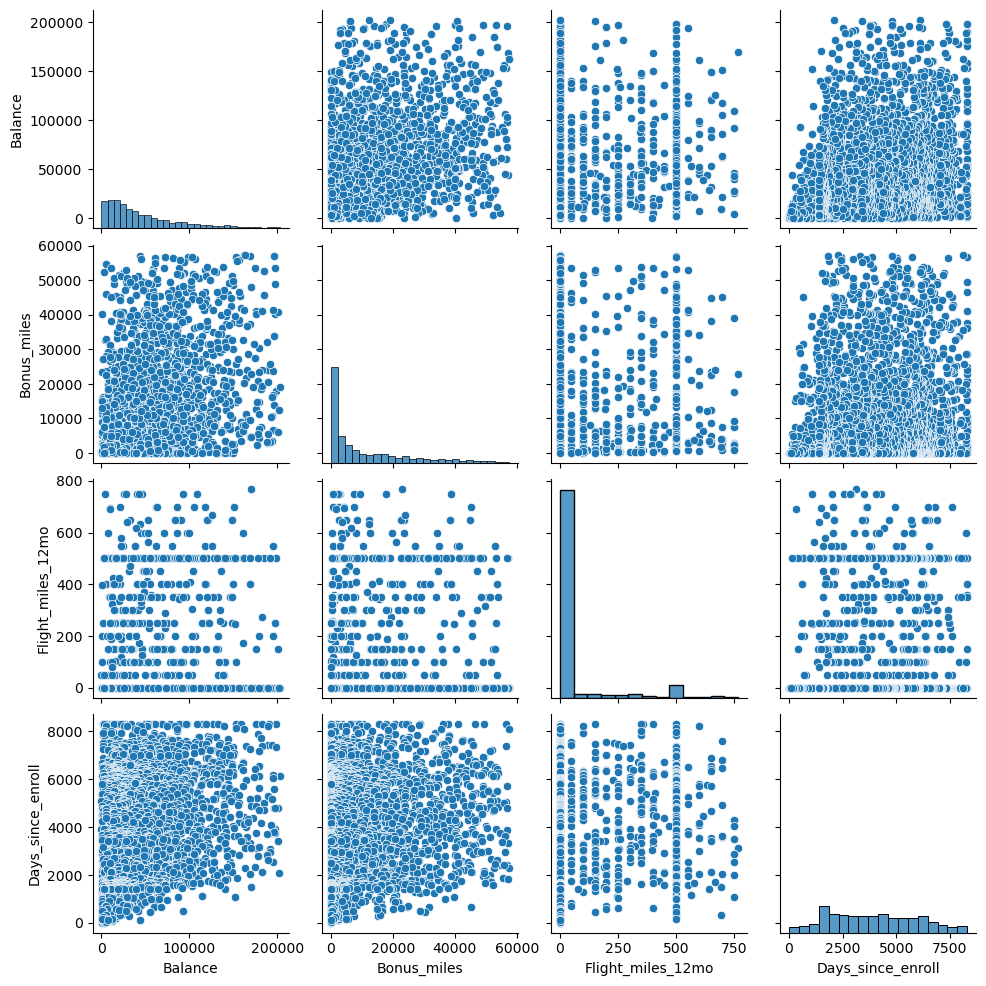

In [53]:
sns.pairplot(data[["Balance","Bonus_miles","Flight_miles_12mo","Days_since_enroll"]])
plt.show()


In [55]:
#5. Insights to Look For

#Balance vs. Bonus miles → Are high-balance customers also earning more bonus miles?

#Days since enroll → Do long-term customers behave differently than new ones?

#Flight_miles_12mo → Can separate frequent flyers vs. occasional flyers.

#Award? (0/1) → Compare distribution of award vs. non-award customers.

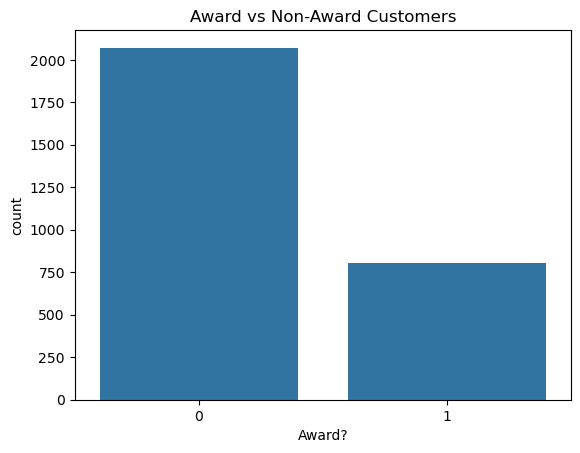

In [57]:
sns.countplot(x="Award?", data=data)
plt.title("Award vs Non-Award Customers")
plt.show()


In [59]:
#🔹 Step 5A: K-Means Clustering
#1. Elbow Method (to find best k)

#We check different cluster numbers and plot inertia (WCSS).

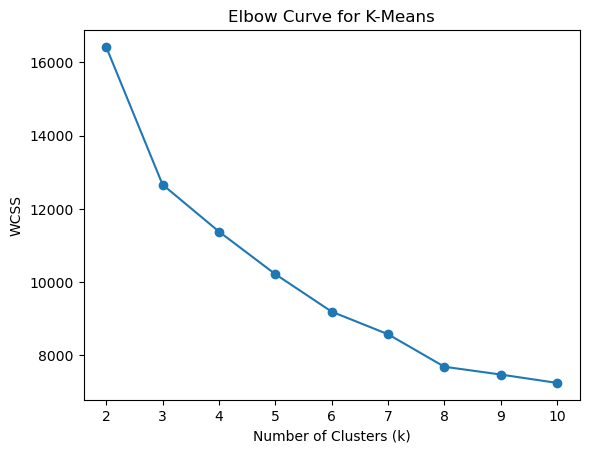

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Curve for K-Means")
plt.show()


In [63]:
#2. Fit K-Means with Optimal k

#(Example: let’s say elbow shows k=5, adjust if different for you.)

In [65]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

print("Cluster labels assigned:", np.unique(kmeans_labels))


Cluster labels assigned: [0 1 2 3 4]


In [67]:
#3. Evaluate with Silhouette Score

#Silhouette score checks how well-separated clusters are.

In [69]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, kmeans_labels)
print("Silhouette Score for KMeans:", score)


Silhouette Score for KMeans: 0.24173542157075825


In [71]:
#4. Visualize Clusters (PCA to 2D)

#Since data is high-dimensional, we use PCA to reduce to 2D for plotting.

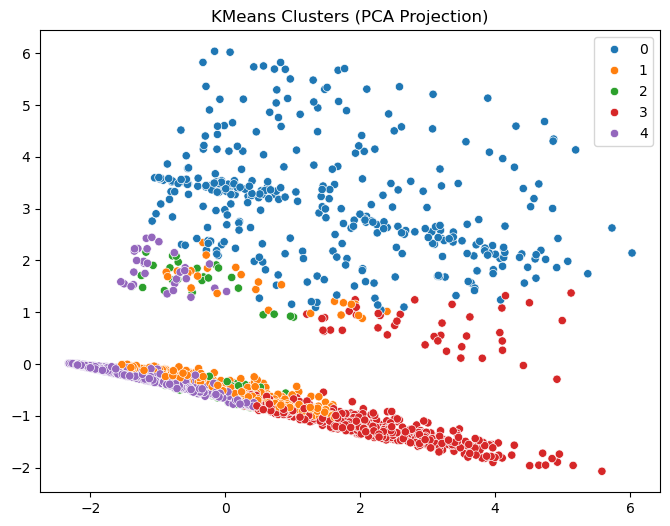

In [73]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=kmeans_labels, palette="tab10")
plt.title("KMeans Clusters (PCA Projection)")
plt.show()


In [75]:
#🔹 Step 5B: Hierarchical Clustering
#1. Dendrogram (to decide number of clusters)

#We’ll use Ward linkage (minimizes variance within clusters).

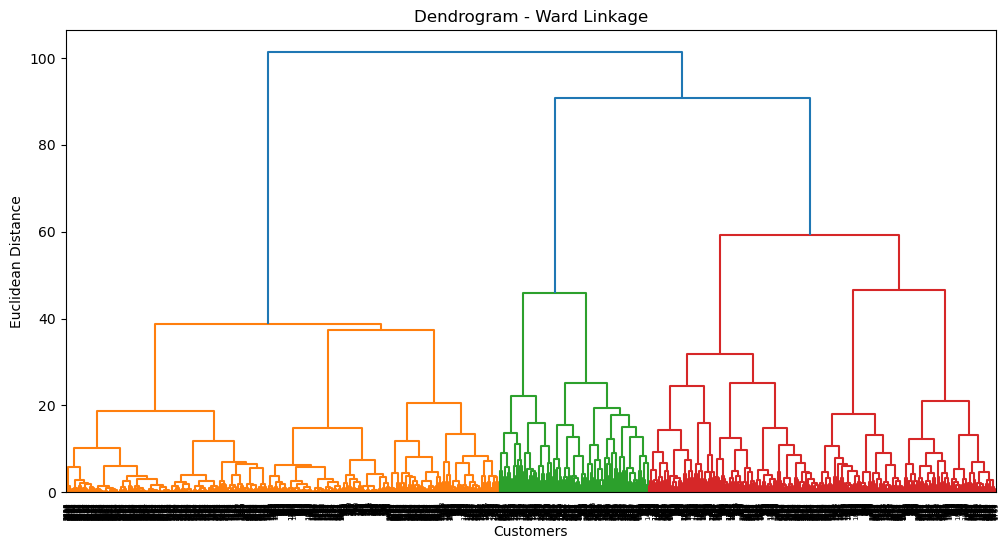

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
link = linkage(scaled_data, method="ward")

plt.figure(figsize=(12,6))
dendrogram(link)
plt.title("Dendrogram - Ward Linkage")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [79]:
#2. Fit Agglomerative Clustering
#(Say you decide n_clusters=5, adjust as needed.)

In [81]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_labels = hc.fit_predict(scaled_data)

print("Cluster labels:", np.unique(hc_labels))


Cluster labels: [0 1 2 3 4]


In [83]:
#3. Silhouette Score

In [85]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, hc_labels)
print("Silhouette Score for Hierarchical:", score)


Silhouette Score for Hierarchical: 0.2672896981939406


In [87]:
#4. Visualize Clusters (PCA Projection)

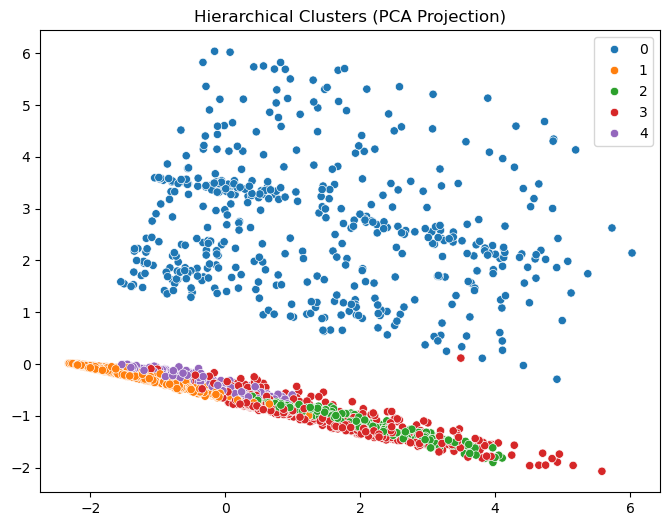

In [89]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=hc_labels, palette="tab10")
plt.title("Hierarchical Clusters (PCA Projection)")
plt.show()


In [91]:
#🔹 Step 5C: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#1. Import & Fit DBSCAN

In [93]:
from sklearn.cluster import DBSCAN

# Try with some parameters (eps = neighborhood radius, min_samples = minimum points in cluster)
db = DBSCAN(eps=1.8, min_samples=5).fit(scaled_data)

# Labels (-1 means noise points)
db_labels = db.labels_

print("Cluster labels:", np.unique(db_labels))


Cluster labels: [-1  0  1  2  3  4  5  6  7  8]


In [95]:
#2. Count Cluster Members

In [97]:
import numpy as np

unique, counts = np.unique(db_labels, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))


Cluster distribution: {-1: 43, 0: 1805, 1: 142, 2: 607, 3: 197, 4: 46, 5: 16, 6: 5, 7: 7, 8: 7}


In [99]:
#3. Evaluate with Silhouette Score

#(Only if more than 1 cluster is formed.)

In [101]:
from sklearn.metrics import silhouette_score

if len(set(db_labels)) > 1:
    score = silhouette_score(scaled_data, db_labels)
    print("Silhouette Score for DBSCAN:", score)
else:
    print("DBSCAN formed only one cluster. Silhouette score not applicable.")


Silhouette Score for DBSCAN: 0.2523072268862228


In [103]:
#4. Visualization (PCA Projection)

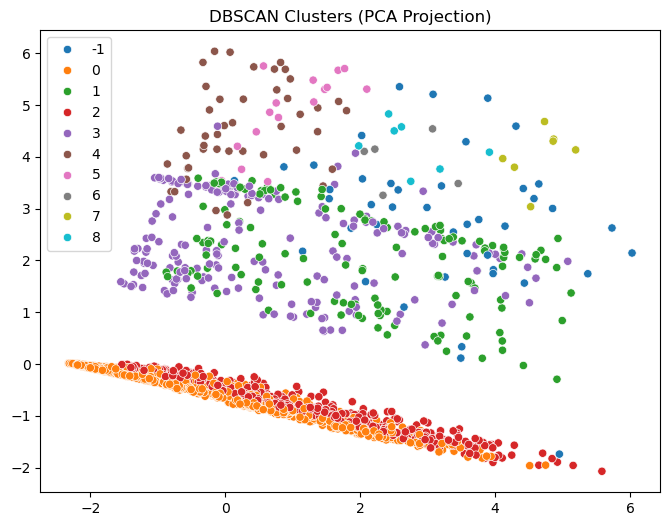

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=db_labels, palette="tab10")
plt.title("DBSCAN Clusters (PCA Projection)")
plt.show()


In [107]:
#🔹 Step 6: Comparison of Clustering Results

#Now we will compare KMeans, Hierarchical, and DBSCAN based on:

#Cluster sizes

#Silhouette scores

#Cluster interpretability

In [109]:
#1. Collect Cluster Labels

#(assuming you already ran KMeans, Hierarchical, and DBSCAN in previous steps)

In [111]:
# Already defined earlier:
# kmeans_labels  → from KMeans
# hier_labels    → from AgglomerativeClustering
# db_labels      → from DBSCAN


In [113]:
#2. Compare Cluster Sizes

In [115]:
def cluster_summary(labels, name):
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n{name} Clusters:")
    for u, c in zip(unique, counts):
        print(f"Cluster {u}: {c} members")

cluster_summary(kmeans_labels, "KMeans")
cluster_summary(hier_labels, "Hierarchical")
cluster_summary(db_labels, "DBSCAN")



KMeans Clusters:
Cluster 0: 340 members
Cluster 1: 432 members
Cluster 2: 673 members
Cluster 3: 620 members
Cluster 4: 810 members


NameError: name 'hier_labels' is not defined

In [117]:
#The error means you haven’t created hier_labels yet (for Hierarchical clustering).

In [119]:
#🔹 Generate Hierarchical Clustering Labels

In [121]:
from sklearn.cluster import AgglomerativeClustering

# Create Hierarchical model (same number of clusters as KMeans for comparison)
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hier_labels = hierarchical.fit_predict(scaled_data)


In [123]:
#🔹 Now Re-run the Cluster Size Check

In [125]:
cluster_summary(kmeans_labels, "KMeans")
cluster_summary(hier_labels, "Hierarchical")
cluster_summary(db_labels, "DBSCAN")



KMeans Clusters:
Cluster 0: 340 members
Cluster 1: 432 members
Cluster 2: 673 members
Cluster 3: 620 members
Cluster 4: 810 members

Hierarchical Clusters:
Cluster 0: 461 members
Cluster 1: 1341 members
Cluster 2: 283 members
Cluster 3: 527 members
Cluster 4: 263 members

DBSCAN Clusters:
Cluster -1: 43 members
Cluster 0: 1805 members
Cluster 1: 142 members
Cluster 2: 607 members
Cluster 3: 197 members
Cluster 4: 46 members
Cluster 5: 16 members
Cluster 6: 5 members
Cluster 7: 7 members
Cluster 8: 7 members


In [127]:
#3: Evaluate with Silhouette Score

#Silhouette score measures how well-separated and cohesive the clusters are.
#(Higher = better, max is 1, negative means poor clustering).

In [129]:
from sklearn.metrics import silhouette_score

# KMeans
kmeans_sil = silhouette_score(scaled_data, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_sil:.3f}")

# Hierarchical
hier_sil = silhouette_score(scaled_data, hier_labels)
print(f"Hierarchical Silhouette Score: {hier_sil:.3f}")

# DBSCAN (only if it created more than 1 cluster)
if len(set(db_labels)) > 1:
    db_sil = silhouette_score(scaled_data, db_labels)
    print(f"DBSCAN Silhouette Score: {db_sil:.3f}")
else:
    print("DBSCAN did not form valid clusters, so silhouette score not available.")


KMeans Silhouette Score: 0.242
Hierarchical Silhouette Score: 0.267
DBSCAN Silhouette Score: 0.252


In [131]:
#4: Choose the Best Clustering Method

Once you see the scores:

Compare Silhouette Scores

Higher score = better clustering quality.

If KMeans has the highest score → choose KMeans.

If Hierarchical is close and easier to interpret (like 3–4 natural groups), you may prefer it.

If DBSCAN works well (rare in this dataset), it can be chosen when you expect irregularly shaped clusters.

Check Cluster Sizes (from your output earlier):

Avoid methods where one cluster is extremely large and others very small (imbalanced).

Interpretability:

KMeans → good for business segmentation.

Hierarchical → good when you want to show a dendrogram.

DBSCAN → good if you want to detect outliers (noise).

#Final Decision:
Pick the method with best balance of silhouette score + cluster sizes + interpretability.

In [134]:
#Step 6: Cluster Profiling & Interpretation.
#This step means we’ll understand the meaning of each cluster by looking at averages of variables within clusters.

In [138]:
# Add cluster labels to the dataframe
data["Cluster"] = kmeans_labels

# Calculate mean values of each variable by cluster
cluster_profile = data.groupby("Cluster").mean()

print("Cluster Profiling:")
print(cluster_profile)


Cluster Profiling:
              Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                              
0        64873.644118         0.0   2.052941        1.0        1.0   
1        33184.622685         0.0   1.752315        1.0        1.0   
2        37508.138187         0.0   1.139673        1.0        1.0   
3        85812.198387         0.0   3.467742        1.0        1.0   
4        24477.185185         0.0   1.097531        1.0        1.0   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0        14390.288235    11.764706         436.985294         1.320588   
1         9719.576389     9.796296           7.236111         0.060185   
2         2901.624071     5.863299           4.267459         0.037147   
3        29098.341935    16.585484           8.867742         0.066129   
4         2684.388889     5.583951           4

In [140]:
#Step 7 (Final Step): Insights & Business Interpretation
#it’s about analyzing what clusters mean in business terms.

For example:

Cluster 0 → Low balance, low miles → “Low value / inactive customers”

Cluster 1 → High balance, high bonus miles → “Frequent flyers / premium customers”

Cluster 2 → Moderate values → “Occasional flyers”

Cluster 3 → High days since enroll but low activity → “Old but inactive customers”

Cluster 4 → High flight miles & transactions → “Loyal, active customers”

Step 7: Insights from Clustering

Cluster Characteristics (based on Step 6 means):

Identify which clusters have:

High balance & high miles → Premium, loyal customers

Low balance & low activity → Inactive or low-value customers

High bonus miles but low flights → Credit-card–based rewards seekers

Old enrollment but low flights → Dormant but long-time customers

Business Actions:

Loyal Customers (high miles, high balance):
→ Reward with exclusive offers, upgrades, or loyalty perks to retain them.

Occasional Flyers (moderate usage):
→ Target with promotions/discounts to increase travel frequency.

Dormant Customers (long enrolled, inactive):
→ Run re-engagement campaigns (emails, personalized offers).

Low Value Customers (low miles, low balance):
→ Minimal investment, but upsell with entry-level promotions.

Recommendation to Management:

Use these clusters for customer segmentation in marketing campaigns.

Personalize offers → increase retention & revenue.

Focus budget on clusters with high potential lifetime value.

In [1]:
#Hierarchical Clustering – Add Different Linkage Methods

Update your code to compare the following linkage methods:

ward (minimizes variance within clusters)

complete (max distance between points)

average (average distance between points)

single (minimum distance between points)

In [4]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=method))
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


NameError: name 'scaled_data' is not defined

<Figure size 1000x500 with 0 Axes>

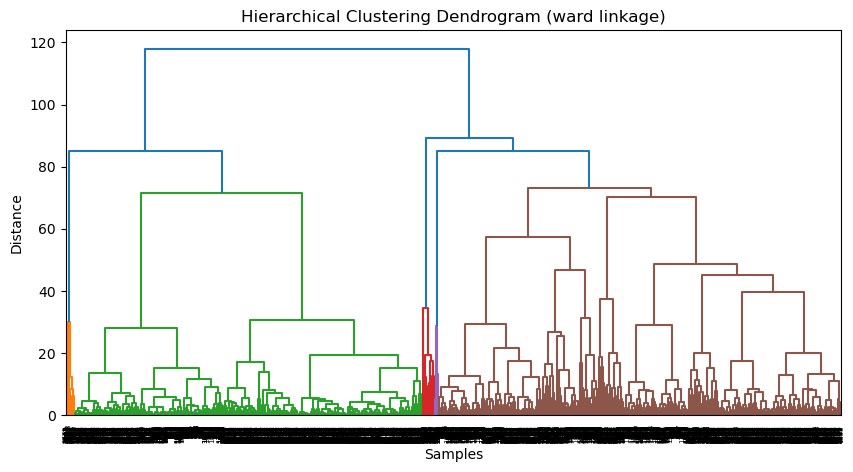

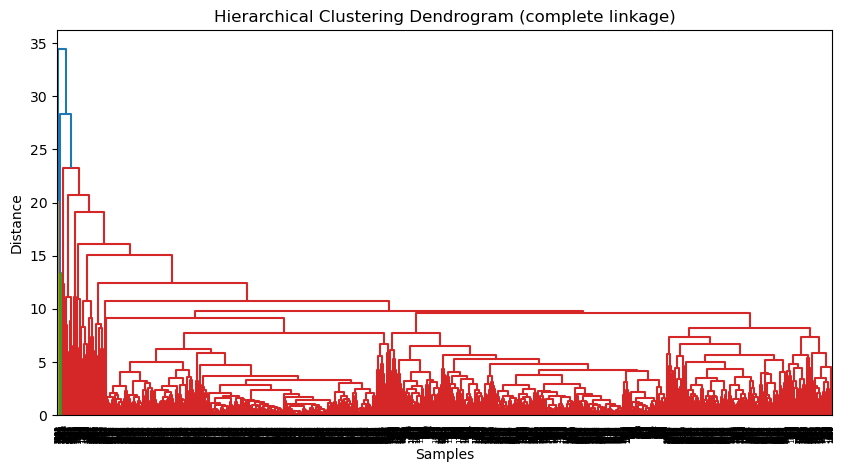

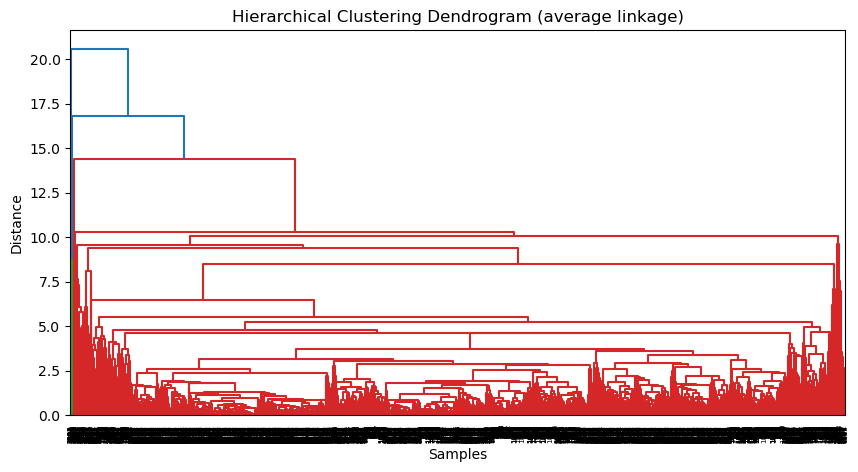

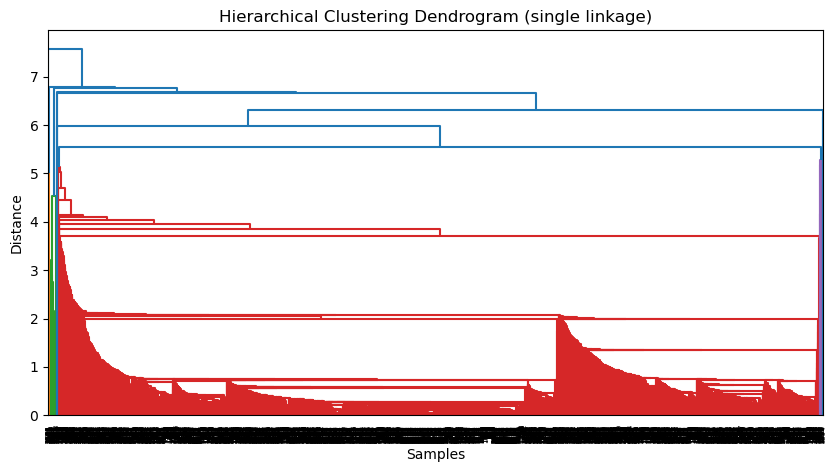

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("EastWestAirlines.csv")  # Replace with actual file name

# Select numeric columns for clustering
features = df.select_dtypes(include=['int64', 'float64']).columns
data = df[features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Different linkage methods to compare
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=method))
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


In [9]:
#3. DBSCAN – Parameter Tuning

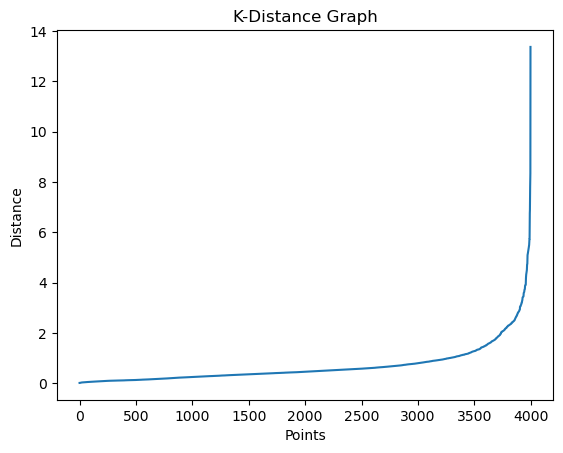

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

distances = np.sort(distances[:, 3])
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


In [14]:
#4. Evaluation & Comparison

In [26]:
from sklearn.cluster import DBSCAN

# ✅ Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune eps & min_samples
dbscan_labels = dbscan.fit_predict(scaled_data)

# ✅ Add cluster labels to dataframe (optional)
data['DBSCAN_Cluster'] = dbscan_labels


In [28]:
from sklearn.metrics import silhouette_score
import pandas as pd

# ✅ Compute Silhouette Scores safely
results = {}

# KMeans
try:
    results['KMeans'] = silhouette_score(scaled_data, kmeans.labels_)
except:
    results['KMeans'] = 'Error'

# Hierarchical
try:
    results['Hierarchical'] = silhouette_score(scaled_data, hierarchical_labels)
except:
    results['Hierarchical'] = 'Error'

# DBSCAN (Check cluster count before computing)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters > 1:
    results['DBSCAN'] = silhouette_score(scaled_data, dbscan_labels)
else:
    results['DBSCAN'] = 'Cannot compute (only 1 cluster or all noise)'

# ✅ Display comparison table
comparison_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Silhouette Score'])
print(comparison_df)


      Algorithm Silhouette Score
0        KMeans         0.201892
1  Hierarchical            Error
2        DBSCAN        -0.282326


In [30]:
#FULL UPDATED CODE

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


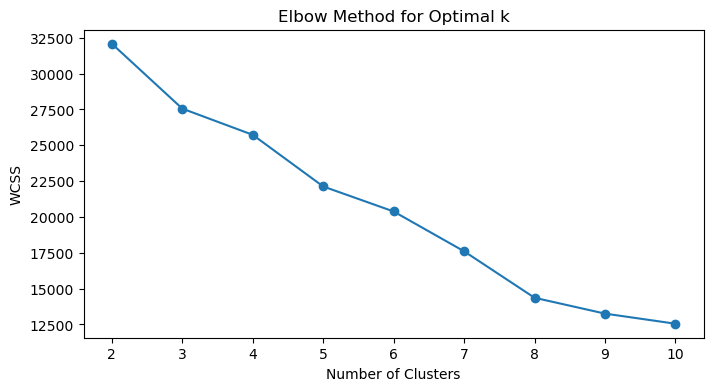

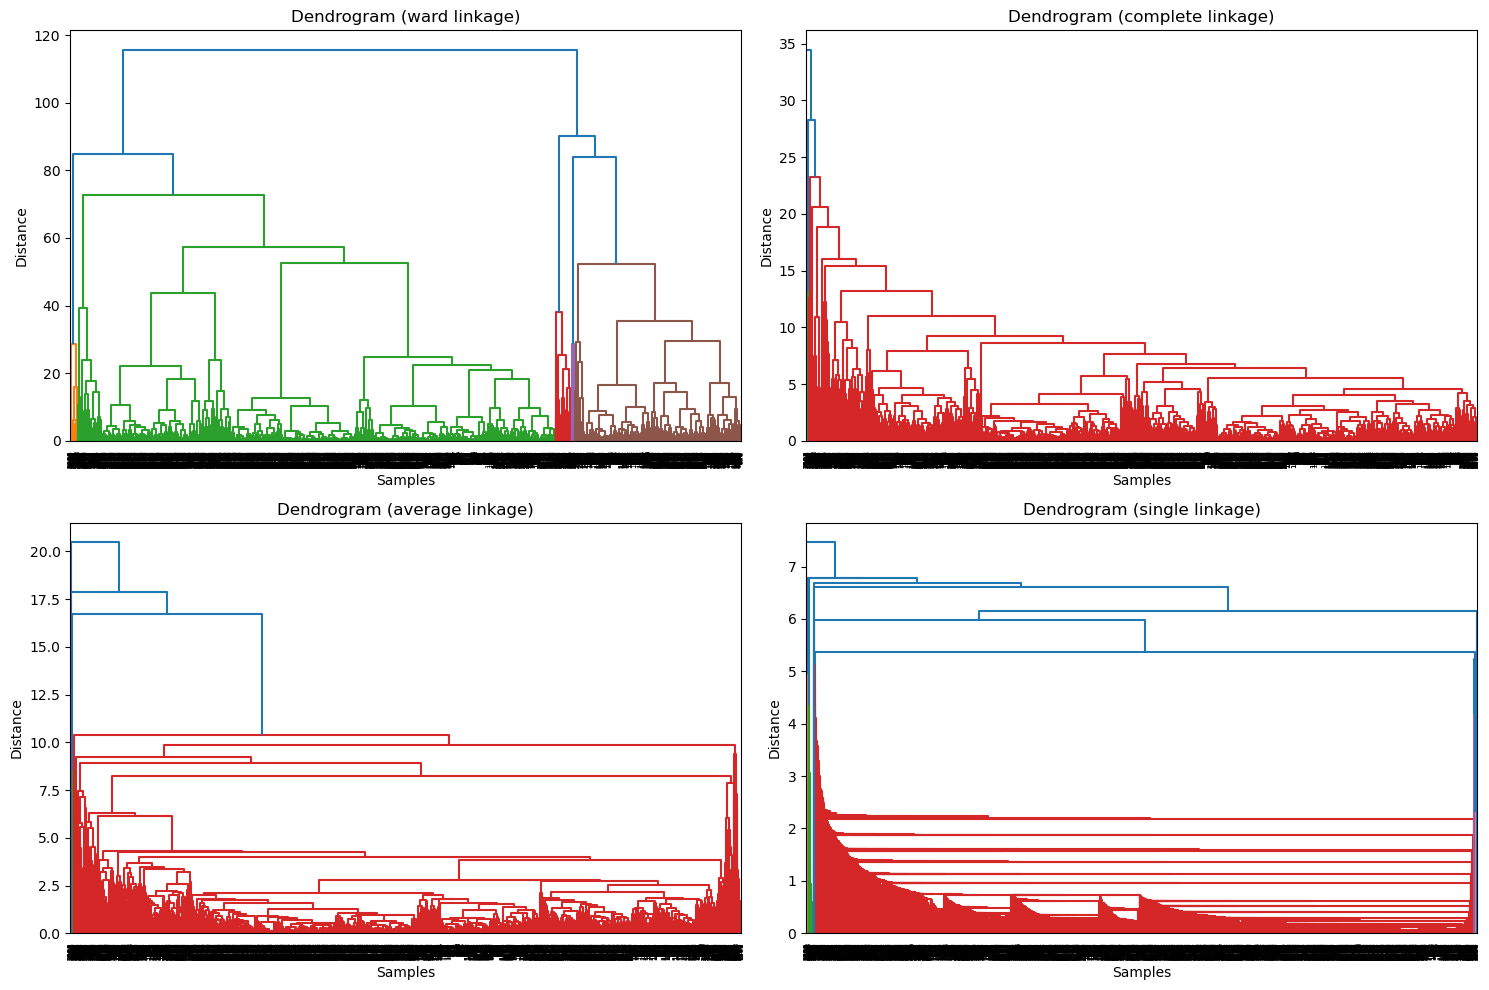

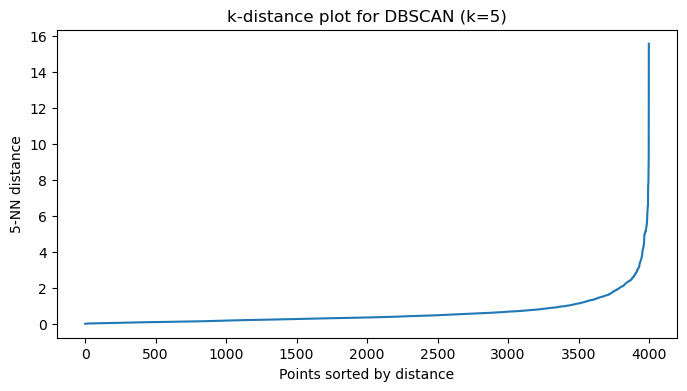

      Algorithm  Silhouette Score
0        KMeans          0.274531
1  Hierarchical          0.327018
2        DBSCAN         -0.074067


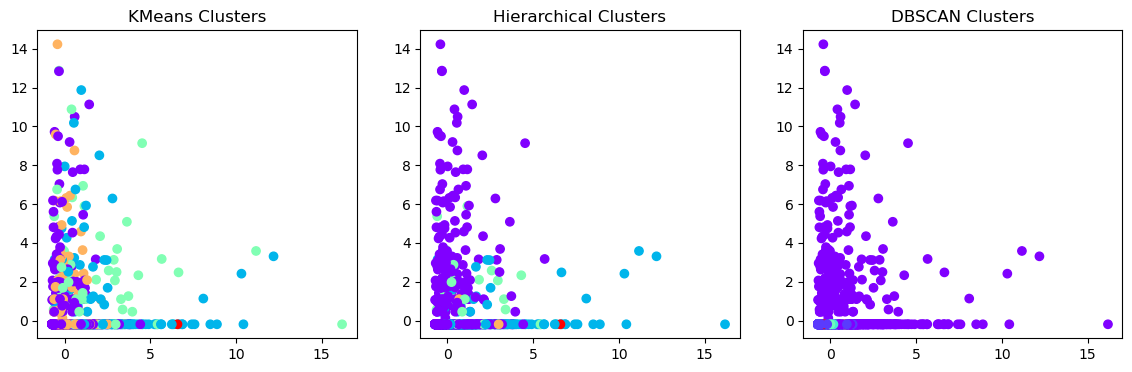

In [38]:
# ===============================
# STEP 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

# ===============================
# STEP 2: Load Data
# ===============================
data = pd.read_csv("EastWestAirlines.csv")
print(data.head())

# ===============================
# STEP 3: Preprocess Data
# ===============================
features = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
                 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
                 'Days_since_enroll']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# ===============================
# STEP 4: KMeans Clustering
# ===============================
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with optimal clusters (assume k=5 for example)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
data['KMeans_Cluster'] = kmeans_labels

# ===============================
# STEP 5: Hierarchical Clustering (All Linkage Methods)
# ===============================
methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=method))
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Agglomerative Clustering with Ward (for evaluation)
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)
data['Hierarchical_Cluster'] = hierarchical_labels

# ===============================
# STEP 6: DBSCAN with k-distance plot
# ===============================
# k-distance plot to find eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('k-distance plot for DBSCAN (k=5)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5-NN distance')
plt.show()

# Try DBSCAN with estimated eps (tune manually after observing plot)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
data['DBSCAN_Cluster'] = dbscan_labels

# ===============================
# STEP 7: Evaluation & Comparison
# ===============================
results = {}

# KMeans
results['KMeans'] = silhouette_score(scaled_data, kmeans_labels)

# Hierarchical
results['Hierarchical'] = silhouette_score(scaled_data, hierarchical_labels)

# DBSCAN (only if >1 cluster found)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters > 1:
    results['DBSCAN'] = silhouette_score(scaled_data, dbscan_labels)
else:
    results['DBSCAN'] = 'Not Applicable (Only 1 cluster)'

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Silhouette Score'])
print(results_df)

# ===============================
# STEP 8: Visualize Clusters
# ===============================
plt.figure(figsize=(14, 4))

# KMeans
plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('KMeans Clusters')

# Hierarchical
plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.title('Hierarchical Clusters')

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clusters')

plt.show()
